<a href="https://colab.research.google.com/github/Neel77Mahi/Resume-Ranker/blob/main/source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns



# ✅ Correct way to load Resume Dataset
resume_df = pd.read_csv('/content/UpdatedResumeDataSet.csv')
print(resume_df.shape)
resume_df.head()


# ✅ Correct way to load Job Description Dataset
jd_df = pd.read_csv('/content/job_title_des.csv')
print(jd_df.shape)
jd_df.head()

print(jd_df.columns)

(962, 2)
(2277, 3)
Index(['Unnamed: 0', 'Job Title', 'Job Description'], dtype='object')


In [4]:
import re
import string

# Text cleaning function
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning on resume
resume_df['cleaned_resume'] = resume_df['Resume'].apply(clean_text)

# ✅ Apply cleaning on job description correctly
jd_df['cleaned_jd'] = jd_df['Job Description'].apply(clean_text)

from sklearn.feature_extraction.text import TfidfVectorizer
# Combine both cleaned resume and cleaned job description
all_texts = pd.concat([resume_df['cleaned_resume'], jd_df['cleaned_jd']])

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(all_texts)

# Split back into resume vectors and JD vectors
resume_vectors = tfidf_matrix[:len(resume_df)]
jd_vectors = tfidf_matrix[len(resume_df):]

from sklearn.metrics.pairwise import cosine_similarity


In [5]:
# Store similarity scores
similarity_scores = []

for i in range(resume_vectors.shape[0]):
    score = cosine_similarity(resume_vectors[i], jd_vectors[i])[0][0]
    similarity_scores.append(score)

# Attach the similarity scores to resume_df
resume_df['similarity_score'] = similarity_scores

# View top resumes (highest matching score)
resume_df.sort_values(by='similarity_score', ascending=False).head(10)

from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity


In [6]:
# Load Sentence-BERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Encode cleaned resumes and cleaned job descriptions
resume_embeddings = model.encode(resume_df['cleaned_resume'].tolist(), show_progress_bar=True)
jd_embeddings = model.encode(jd_df['cleaned_jd'].tolist(), show_progress_bar=True)

# Cosine Similarity with BERT embeddings
bert_similarity_scores = []

for i in range(len(resume_embeddings)):
    score = cosine_similarity([resume_embeddings[i]], [jd_embeddings[i]])[0][0]
    bert_similarity_scores.append(score)

# Add BERT similarity scores to resume_df
resume_df['bert_similarity_score'] = bert_similarity_scores

# View Top Matches
resume_df.sort_values(by='bert_similarity_score', ascending=False).head(10)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/31 [00:00<?, ?it/s]

Batches:   0%|          | 0/72 [00:00<?, ?it/s]

,Category,Resume,cleaned_resume,similarity_score,bert_similarity_score
677,Network Security Engineer,"Technical Expertise: â¢ Cisco ASA, Checkpoint...",technical expertise â¢ cisco asa checkpoint f...,0.301197,0.723345
392,Java Developer,TECHNICAL STRENGTHS Computer Language Java/J2E...,technical strengths computer language javajee ...,0.060998,0.696415
180,Web Designing,"Technical Skills Web Technologies: Angular JS,...",technical skills web technologies angular js h...,0.119709,0.694212
868,Blockchain,Skills Strong CS fundamentals and problem solv...,skills strong cs fundamentals and problem solv...,0.138596,0.649529
72,HR,SOFTWARE SKILLS: â¢ General Computer Proficie...,software skills â¢ general computer proficien...,0.070319,0.648116
587,Python Developer,Technical Skills / Responsibilities: â¢ Hands...,technical skills responsibilities â¢ hands on...,0.105564,0.638202
363,Java Developer,"TECHNICAL SKILLS Skills: Java, SQL, PL/SQL, C,...",technical skills skills java sql plsql c c boo...,0.053069,0.629583
396,Java Developer,"TECHNICALSKILLS SpringMVC, Hibernate, JDBC, Ja...",technicalskills springmvc hibernate jdbc java ...,0.132620,0.626900
843,DotNet Developer,"Technical Skills CATEGORY SKILLS Language C, C...",technical skills category skills language c c ...,0.144579,0.622821
620,DevOps Engineer,CORE COMPETENCIES ~ Ant ~ Maven ~ GIT ~ Bitbuc...,core competencies ant maven git bitbucket jenk...,0.246459,0.611167


In [10]:
import pickle

# Save TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save Sentence-BERT model
with open('sentence_bert_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the ranking results
resume_df.to_csv('resume_ranking_results.csv', index=False)


print("✅ Models and results saved successfully!")


✅ Models and results saved successfully!


In [12]:
from google.colab import files
files.download('resume_ranking_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

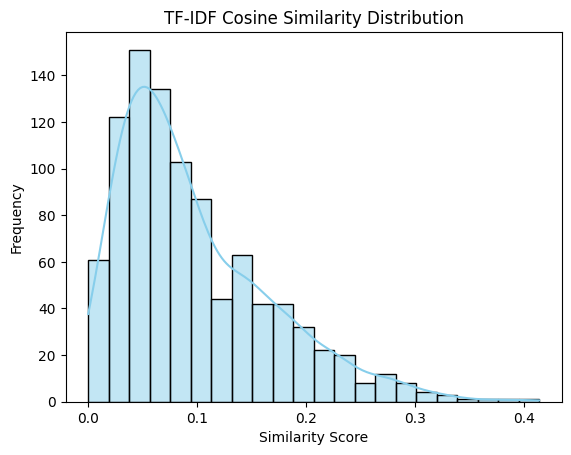

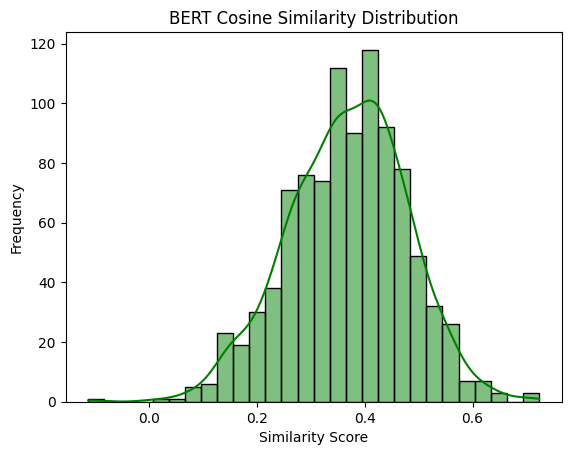

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# TF-IDF Similarity Distribution
sns.histplot(resume_df['similarity_score'], kde=True, color='skyblue')
plt.title("TF-IDF Cosine Similarity Distribution")
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')


plt.show()

# BERT Similarity Distribution
sns.histplot(resume_df['bert_similarity_score'], kde=True, color='green')
plt.title("BERT Cosine Similarity Distribution")
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.show()




In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/


/content/drive/MyDrive
